# Cross-validation: evaluating estimator performance

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter("ignore")

In [20]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

print('Train Data Shape: ', X_train.shape, y_train.shape)
print('Test Data Shape: ', X_test.shape, y_test.shape)

Train Data Shape:  (398, 30) (398,)
Test Data Shape:  (171, 30) (171,)


In [22]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [23]:
clf.coef_

array([[ 1.02587696,  0.48899034,  0.24261962, -0.01780699, -0.03744093,
        -0.18321806, -0.25802603, -0.11106456, -0.05713092, -0.01145138,
         0.03357777,  0.45556487,  0.0679721 , -0.10640287, -0.00352917,
        -0.03860744, -0.05300085, -0.01415418, -0.01384976, -0.00358189,
         1.04526232, -0.54664007, -0.23345816, -0.01168586, -0.06735299,
        -0.55471416, -0.69062588, -0.20471555, -0.18623056, -0.0511477 ]])

In [24]:
clf.score(X_test, y_test)

0.9707602339181286

In [25]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(solver='liblinear', max_iter=500)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[0.92982456 0.93859649 0.97368421 0.94736842 0.96460177]


In [26]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.95 (+/- 0.02)


In [27]:
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.92297297, 0.93369339, 0.97158288, 0.94345238, 0.96245847])

# Plot the learning curve

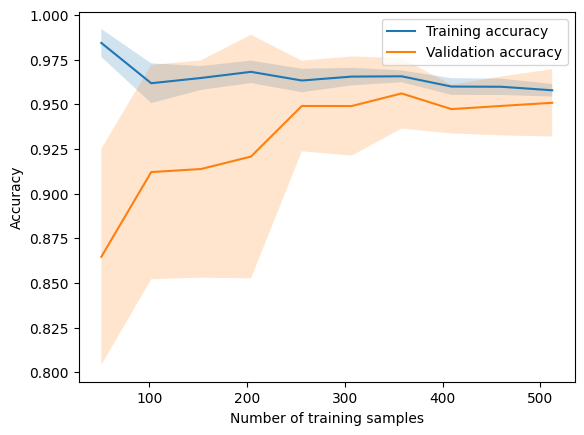

In [28]:
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=10, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.2)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show();

In [29]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
cross_val_score(clf, X, y, cv=cv)

array([0.96491228, 0.97076023, 0.97076023])

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

predicted = cross_val_predict(clf, X, y, cv=10)
metrics.accuracy_score(y, predicted)

0.9507908611599297

In [31]:
from sklearn.linear_model import LassoCV

## Cross validation iterators

In [32]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)
X = ["a", "b", "c", "d"]
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[0 2 3] [1]
[0 1 2] [3]
[1 2 3] [0]
[0 1 3] [2]


In [33]:
from sklearn.model_selection import StratifiedKFold
X = np.ones(20)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[ 2  3  9 10 11 12 13 14 15 16 17 18 19] [0 1 4 5 6 7 8]
[ 0  1  3  4  5  6  7  8 15 16 17 18 19] [ 2  9 10 11 12 13 14]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14] [ 3 15 16 17 18 19]


## Grouped Data

In [34]:
from sklearn.model_selection import GroupKFold
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3 4 5] [6 7 8 9]
[0 1 2 6 7 8 9] [3 4 5]
[3 4 5 6 7 8 9] [0 1 2]


## Time Series Split

In [35]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)

for train, test in tscv.split(X):
    print("%s %s" % (train, test))

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]
